In [1]:
import os
from pathlib import Path

import geopandas as gpd
from sklearn.cluster import HDBSCAN

In [2]:
ZONE = "19.1.01"

In [3]:
generated_path = Path(os.environ["DATA_PATH"]) / "generated"

In [4]:
df = gpd.read_file(generated_path / "denue" / "split" / f"{ZONE}.gpkg")
df = df.to_crs(df.estimate_utm_crs())

In [ ]:
model = HDBSCAN(
    min_cluster_size=1000,
    cluster_selection_epsilon=0,
    n_jobs=-1,
    min_samples=10,
    algorithm="kd_tree",
)
df["label"] = model.fit_predict(df.get_coordinates().to_numpy())
display(df["label"].value_counts().sort_index())

<Axes: >

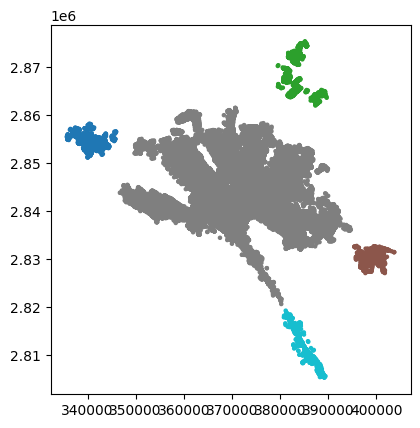

In [ ]:
df.query("label != -1").plot(
    markersize=5, column="label", categorical=True, legend=False,
)